<a href="https://colab.research.google.com/github/takacsanna/igy_neveld_fakt/blob/main/hazi7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###7. házi feladat

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist as mnist
from tensorflow.keras.models import Model


def preprocess(array):

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

4431872/4422102 [==============================] - 0s 0us/step


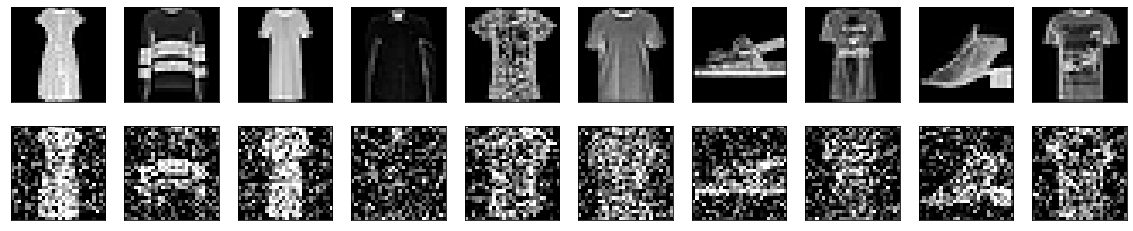

In [2]:
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [3]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [4]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 19s 18ms/step - loss: 0.3033 - val_loss: 0.2727
Epoch 2/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2667 - val_loss: 0.2664
Epoch 3/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2609 - val_loss: 0.2607
Epoch 4/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2575 - val_loss: 0.2585
Epoch 5/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2556 - val_loss: 0.2571
Epoch 6/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2545 - val_loss: 0.2560
Epoch 7/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2537 - val_loss: 0.2554
Epoch 8/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2531 - val_loss: 0.2548
Epoch 9/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2526 - val_loss: 0.2545
Epoch 10/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2522 - val_l

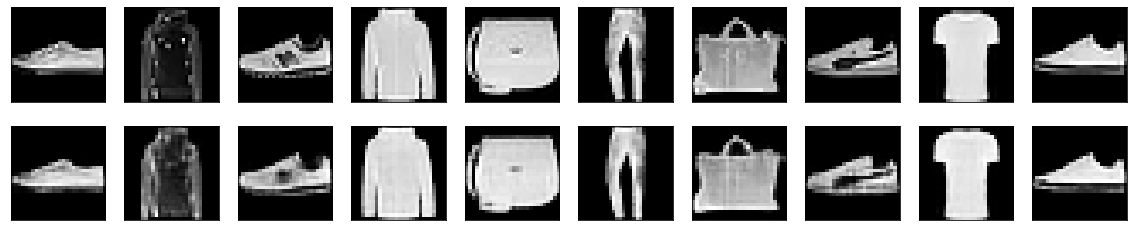

In [5]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [6]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 8s 17ms/step - loss: 0.3005 - val_loss: 0.2954
Epoch 2/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2914 - val_loss: 0.2924
Epoch 3/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2892 - val_loss: 0.2906
Epoch 4/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2878 - val_loss: 0.2897
Epoch 5/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2870 - val_loss: 0.2889
Epoch 6/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2863 - val_loss: 0.2884
Epoch 7/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2858 - val_loss: 0.2878
Epoch 8/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2853 - val_loss: 0.2878
Epoch 9/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2849 - val_loss: 0.2870
Epoch 10/100
469/469 [==============================] - 8s 16ms/step - loss: 0.284

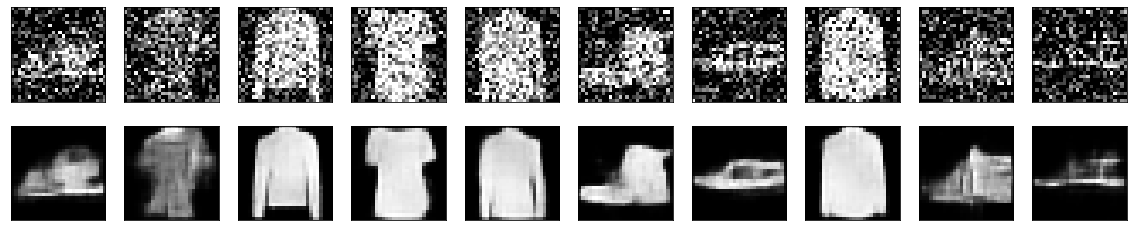

In [7]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)